# Reading and Understanding the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



import warnings
warnings.filterwarnings('ignore')

In [2]:
bike=pd.read_csv('day.csv')

In [3]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
print(bike.shape)

(730, 16)


In [7]:
##Checking the null values in columns
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
##check if there is any duplicate row present and then drop the entire duplicate row
bike_dup=bike.copy()
bike_dup.drop_duplicates(subset=None, inplace=True)

In [9]:
bike_dup.shape

(730, 16)

In [10]:
bike.shape

(730, 16)

...
The shape after running the drop duplicate command is same as the original dataframe.

Hence we can conclude that there were zero duplicate values in the dataset.

#####Removing redundant & unwanted columns

In [11]:
#instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.
bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [12]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


#####Encoding/mapping the column

In [13]:
bike.season=bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [14]:
bike.weathersit=bike.weathersit.map({1:'clear',2:'mist',3:'Light_snowrain',4:'heavy_snowrain'})

In [15]:
bike.mnth = bike.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [16]:
bike.weekday=bike.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [17]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
## checking the data type again
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [19]:
bike.workingday

0      1
1      1
2      1
3      1
4      1
      ..
725    1
726    0
727    0
728    1
729    1
Name: workingday, Length: 730, dtype: int64

# visualising the data

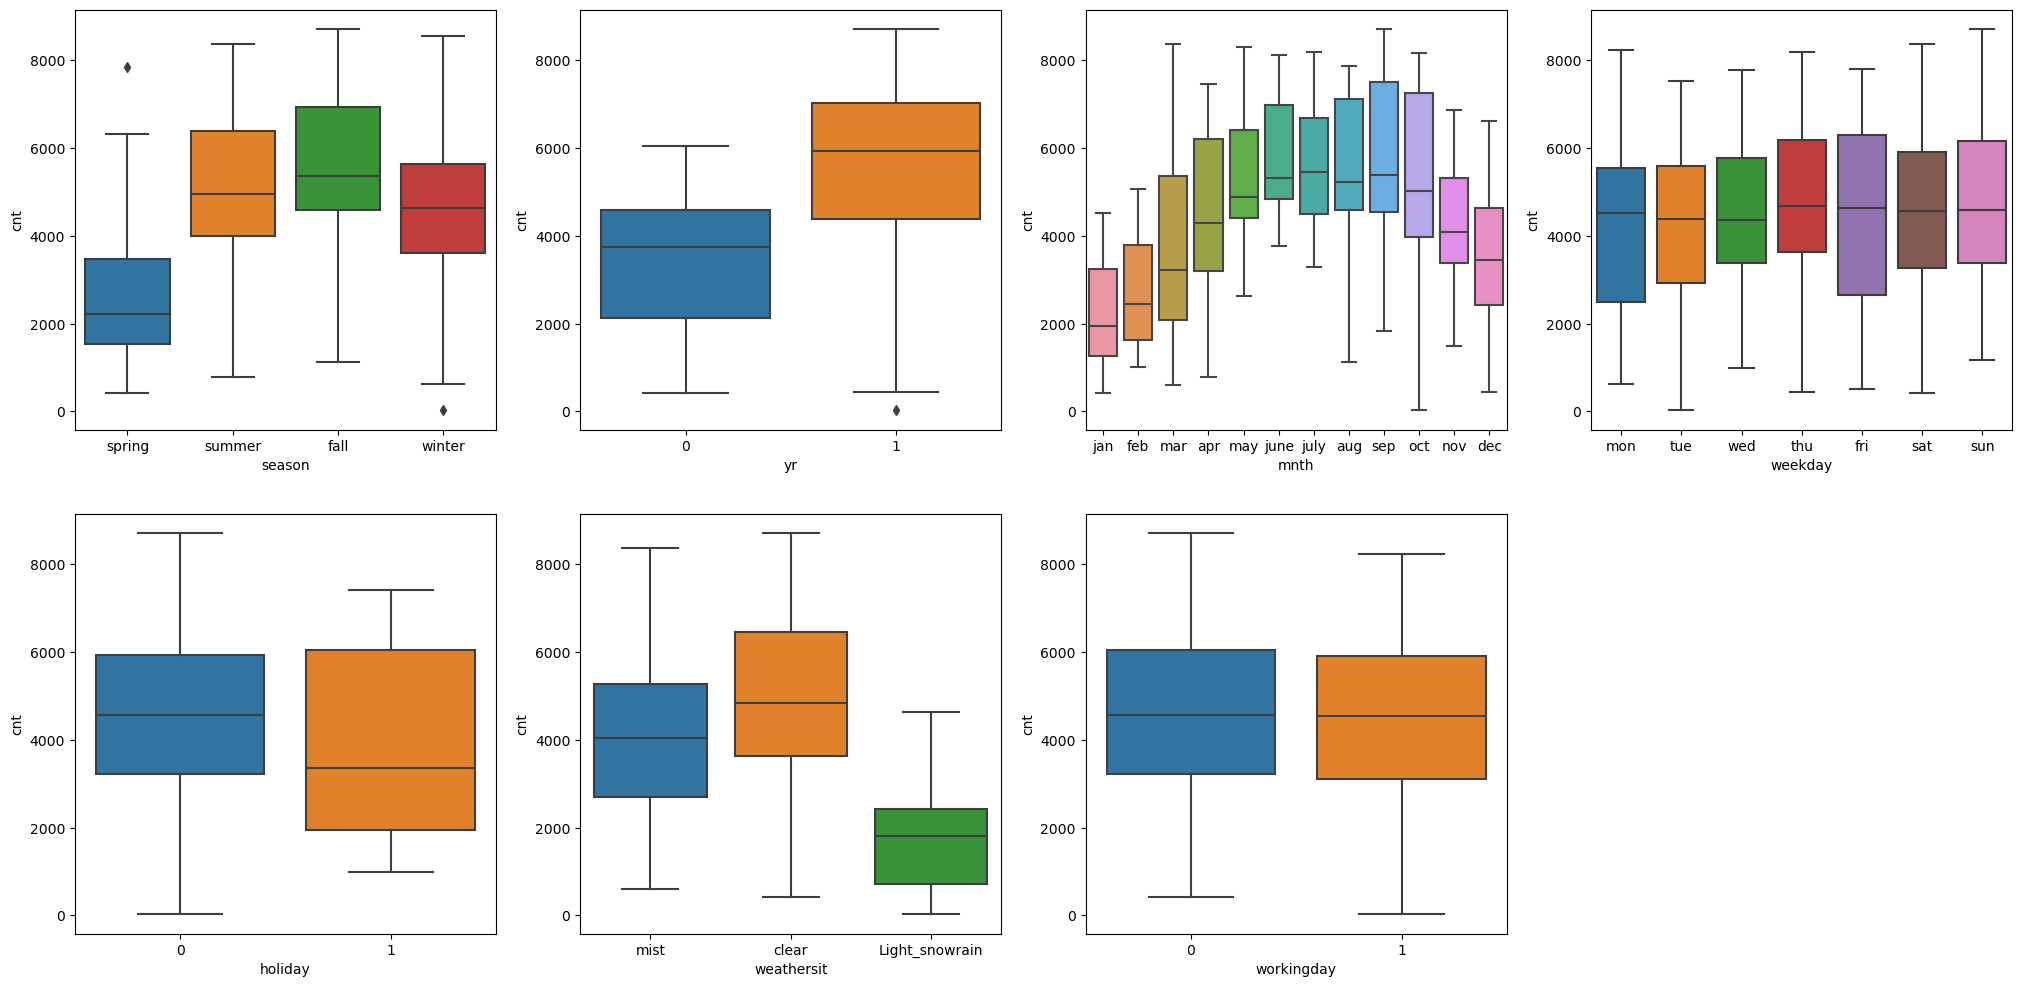

In [20]:
plt.figure(figsize=(25,12))
plt.subplot(2,4,1)
sns.boxplot(x='season',y='cnt',data=bike)
plt.subplot(2,4,2)
sns.boxplot(x='yr',y='cnt',data=bike)
plt.subplot(2,4,3)
sns.boxplot(x='mnth',y='cnt',data=bike)
plt.subplot(2,4,4)
sns.boxplot(x='weekday',y='cnt',data=bike)
plt.subplot(2,4,5)
sns.boxplot(x='holiday',y='cnt',data=bike)
plt.subplot(2,4,6)
sns.boxplot(x='weathersit',y='cnt',data=bike)
plt.subplot(2,4,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

In [21]:
# function to create barplot related to categorical columns

def plot_customize(x):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.barplot(x,"cnt",data=bike)
    plt.subplot(1,2,2)
    sns.barplot(x,'cnt',data=bike,hue="yr")
    plt.legend(labels=['2018','2019'])
    plt.show()

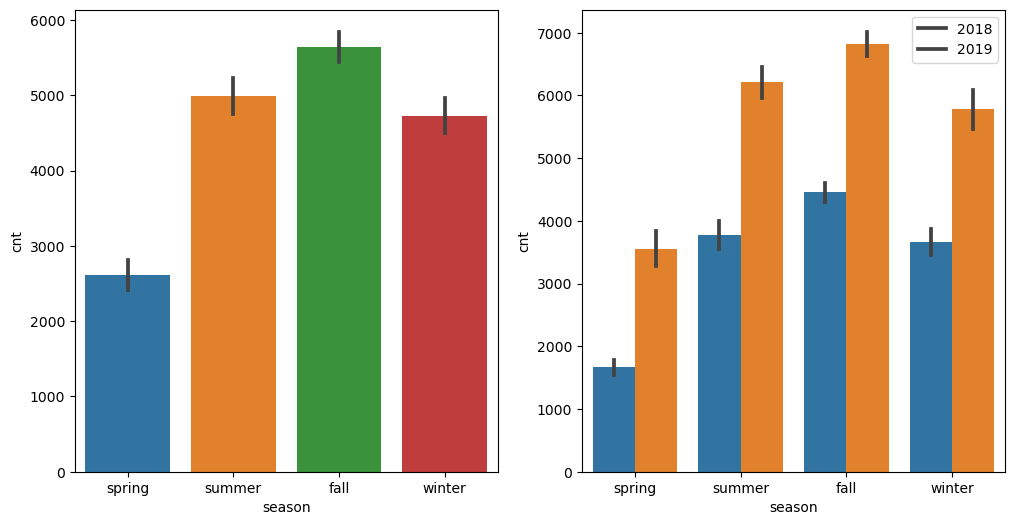

In [22]:
plot_customize("season")
plt.show()

Fall season seems to have attracted more booking. And, in each season the booking count has increased drastically from 2018 to 2019.

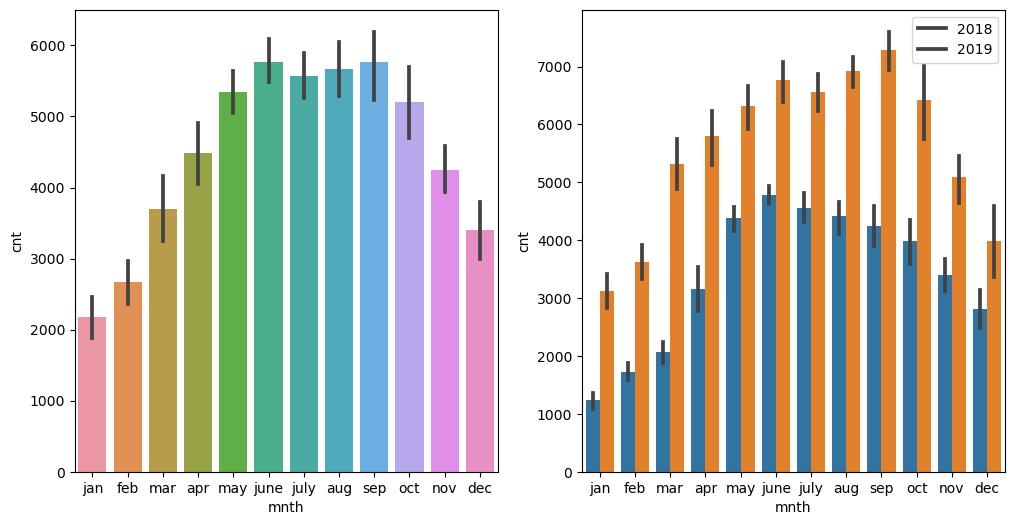

In [23]:
plot_customize("mnth")

Most of the bookings has been done during the month of may, june, july, aug, sep and oct.Trend increased starting of the year tillmid of the year and then it started decreasing as we approached the end of year. Number of booking for each month seems to have increased from 2018 to 2019.

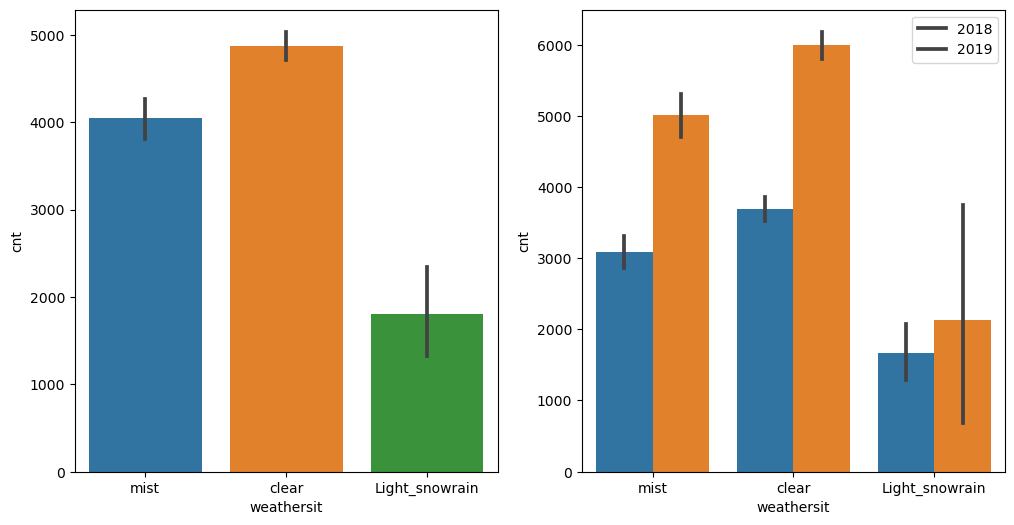

In [24]:
plot_customize("weathersit")

Clear weather attracted more booking which seems obvious. And in comparison to previous year, i.e 2018, booking increased for each weather situation in 2019.

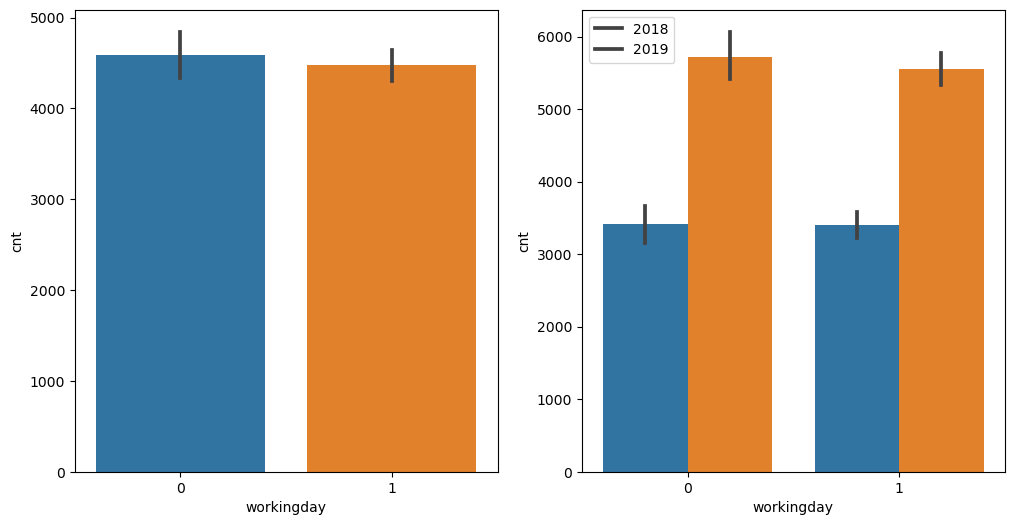

In [25]:
plot_customize("workingday")

Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.

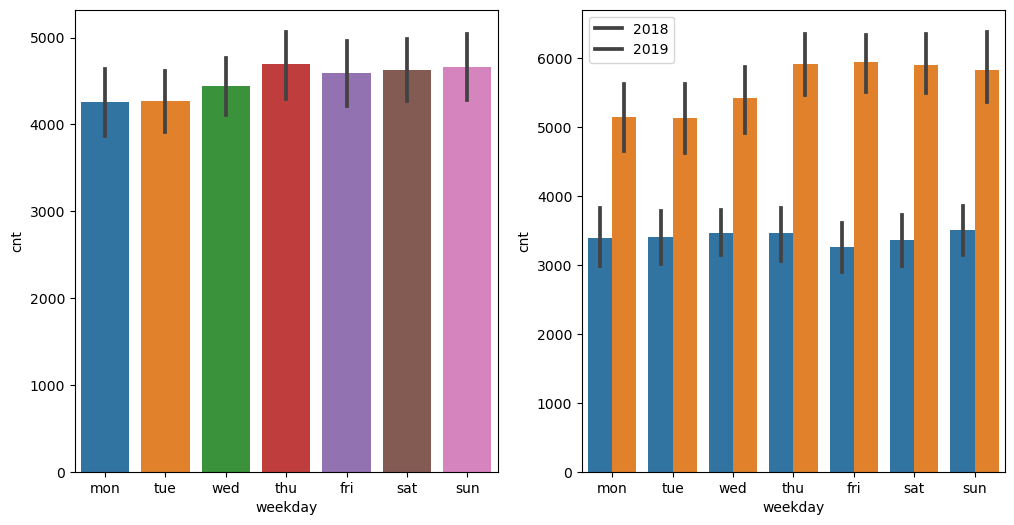

In [26]:
plot_customize("weekday")

Thu, Fir, Sat and Sun have more number of bookings as compared to the start of the week.

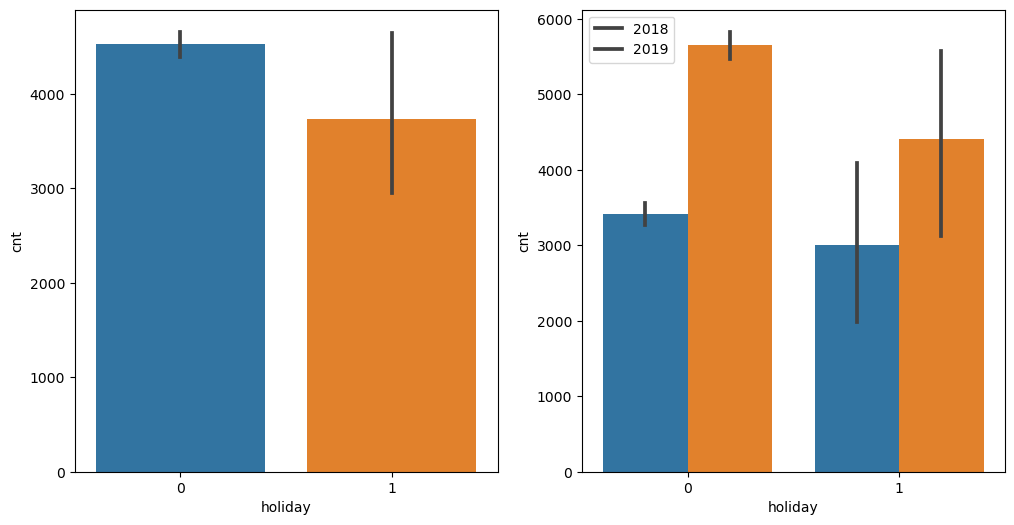

In [27]:
plot_customize("holiday")

When its holiday, booking seems to be less in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family.

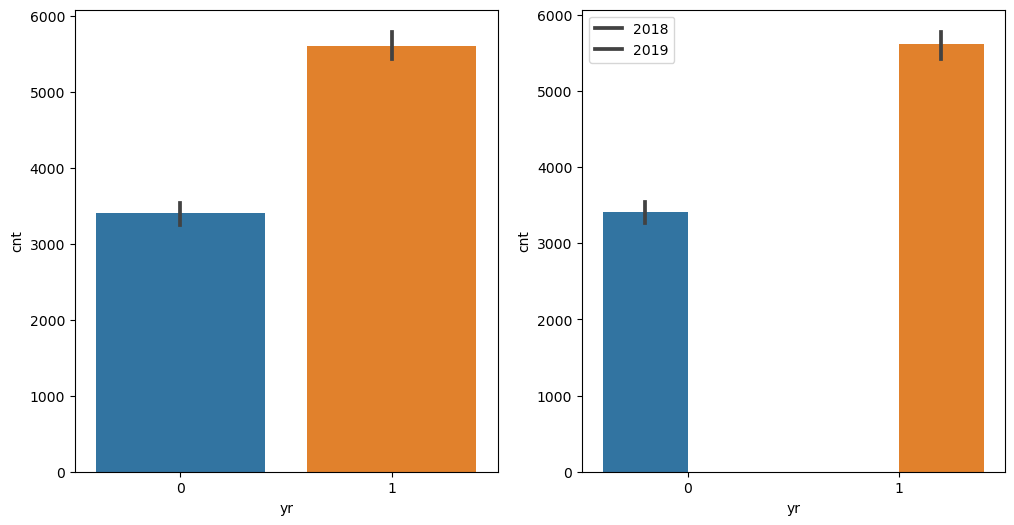

In [28]:
plot_customize("yr")

2019 attracted more number of booking from the previous year, which shows good progress in terms of business.

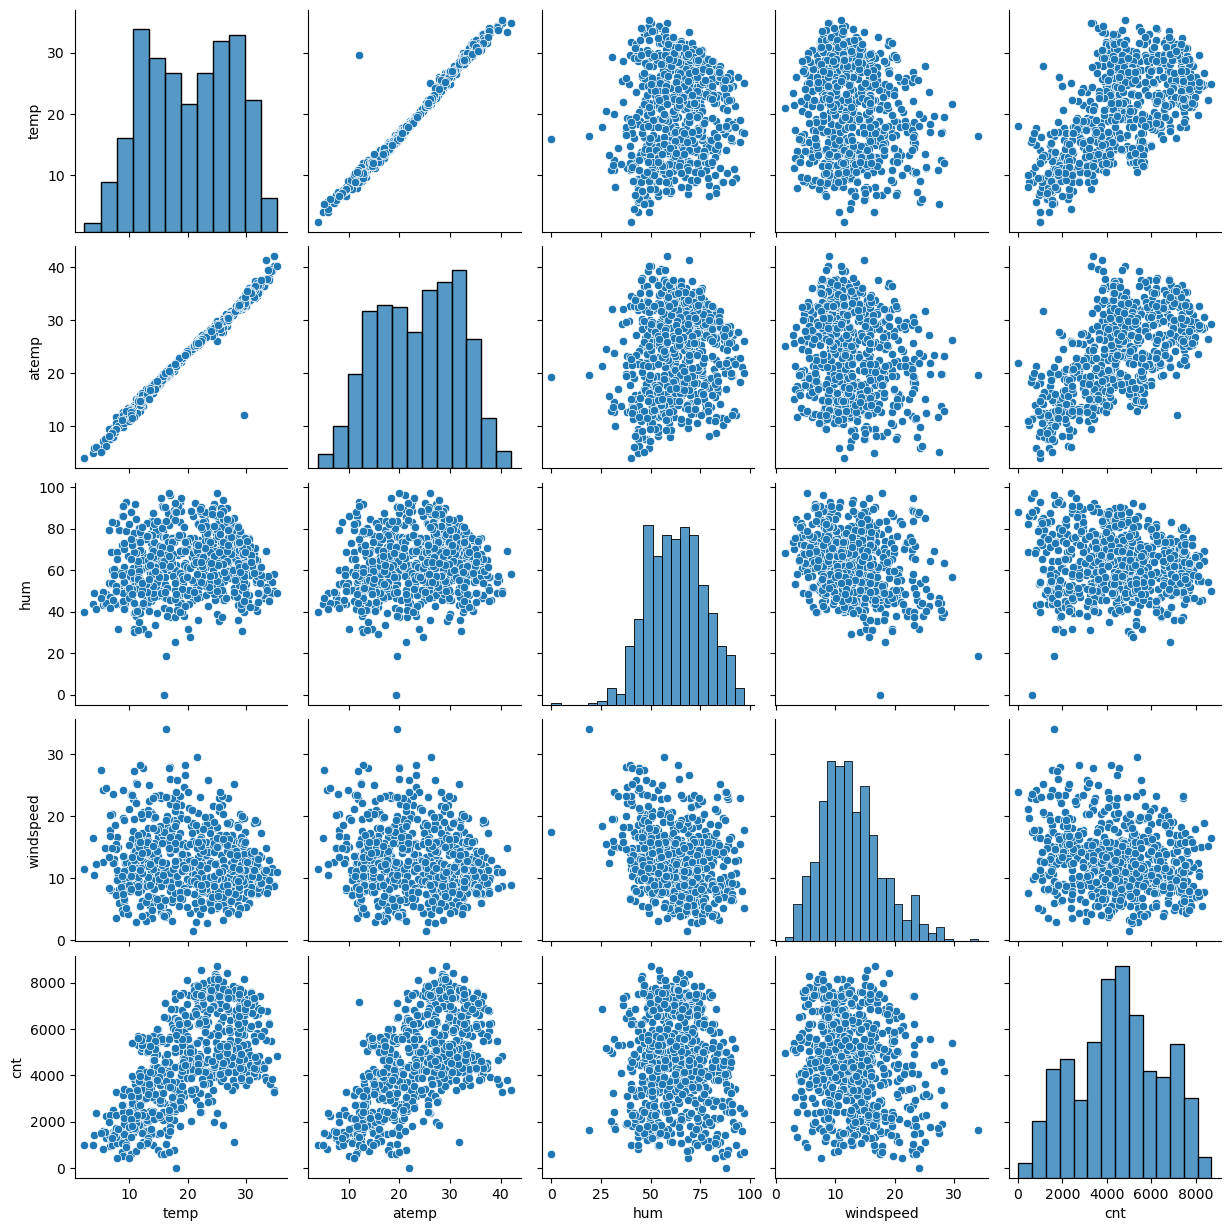

In [29]:
# Analysing/visualizing the numerical columns
sns.pairplot(data=bike,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

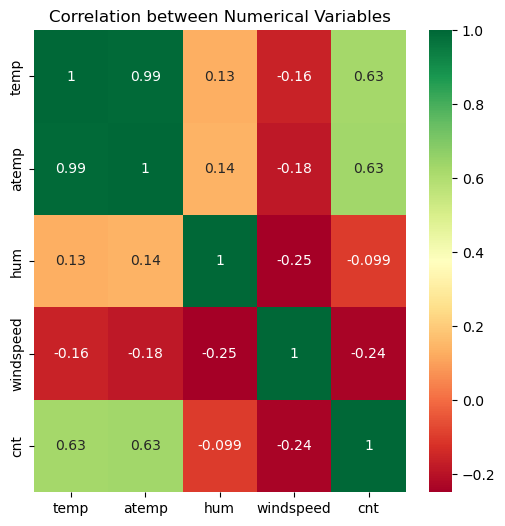

In [30]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))

sns.heatmap(bike[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn")
plt.title("Correlation between Numerical Variables")
plt.show()

###### There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

# Data Preparation

In [31]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(bike.mnth,drop_first=True)
weekdays_df=pd.get_dummies(bike.weekday,drop_first=True)
weathersit_df=pd.get_dummies(bike.weathersit,drop_first=True)
seasons_df=pd.get_dummies(bike.season,drop_first=True)

In [32]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [33]:
bike_new=pd.concat([bike,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [34]:
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,clear,mist,spring,summer,winter
0,spring,0,jan,0,mon,1,mist,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,tue,1,mist,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,1,1,0,0
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,1,0,1,0,0
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,1,0,1,0,0
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,1,0,1,0,0


In [35]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  aug         730 non-null    uint8  
 13  dec         730 non-null    uint8  
 14  feb         730 non-null    uint8  
 15  jan         730 non-null    uint8  
 16  july        730 non-null    uint8  
 17  june        730 non-null    uint8  
 18  mar         730 non-null    uint8  
 19  may         730 non-null    u

In [36]:
##Now lets drop the unwanted columns for which we have created dummy variables
bike_new.drop(['mnth','weekday','weathersit','season'],axis=1,inplace=True)

In [37]:
bike_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,clear,mist,spring,summer,winter
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,1,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,1,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,1,0,1,0,0


In [38]:
bike_new.shape

(730, 30)

# Splitting the Data into Training and Testing Sets

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
# splitting the dataframe into Train and Test
np.random.seed(0)
bike_train,bike_test=train_test_split(bike_new,train_size=0.7,random_state=100)

In [41]:
bike_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,clear,mist,spring,summer,winter
576,1,0,1,29.246653,33.14480,70.4167,11.083475,7216,0,0,...,0,0,0,0,1,1,0,0,0,0
426,1,0,0,16.980847,20.67460,62.1250,10.792293,4066,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,10.489153,11.58500,48.3333,23.500518,1796,0,1,...,0,0,0,0,0,1,0,1,0,0
482,1,0,0,15.443347,18.87520,48.9583,8.708325,4220,0,0,...,0,1,0,0,0,0,1,0,1,0
111,0,0,0,13.803347,16.09770,72.9583,14.707907,1683,0,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,30.852500,35.35440,65.9583,8.666718,7261,1,0,...,0,0,0,0,0,1,0,0,0,0
53,0,0,1,9.091299,12.28585,42.3043,6.305571,1917,0,0,...,0,0,0,0,0,1,0,1,0,0
350,0,0,1,10.591653,12.46855,56.0833,16.292189,2739,0,1,...,0,0,0,0,0,0,1,0,0,1
79,0,0,1,17.647835,20.48675,73.7391,19.348461,2077,0,0,...,0,0,0,0,1,0,1,0,1,0


In [42]:
bike_train.shape

(510, 30)

In [43]:
bike_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,clear,mist,spring,summer,winter
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,0,1,0,1,0,0,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,0,...,0,0,1,0,0,1,0,0,1,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,1,0,0,0,0,0,1,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,1,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,4968,0,0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,1,19.509153,23.45270,73.3750,11.666643,6606,0,1,...,0,0,0,0,1,1,0,0,0,1
127,0,0,1,21.661653,25.94665,63.1667,5.000712,4333,0,0,...,0,0,0,1,0,1,0,0,1,0
640,1,0,1,26.957500,29.95665,79.3750,4.458569,7572,0,0,...,0,0,1,0,0,0,1,0,0,1
72,0,0,1,13.333897,16.60000,49.6957,9.174042,2046,0,0,...,0,0,0,0,1,1,0,1,0,0


In [44]:
bike_test.shape

(220, 30)

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [47]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','hum','windspeed','cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [48]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,clear,mist,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,1,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,0,0,1,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,1,0,0,0,0,1,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,1,0,0,0,0,1,0,1,0


In [49]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,clear,mist,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.129412,0.137255,0.143137,0.152941,0.135294,0.625490,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.335985,0.344454,0.350557,0.360284,0.342373,0.484471,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


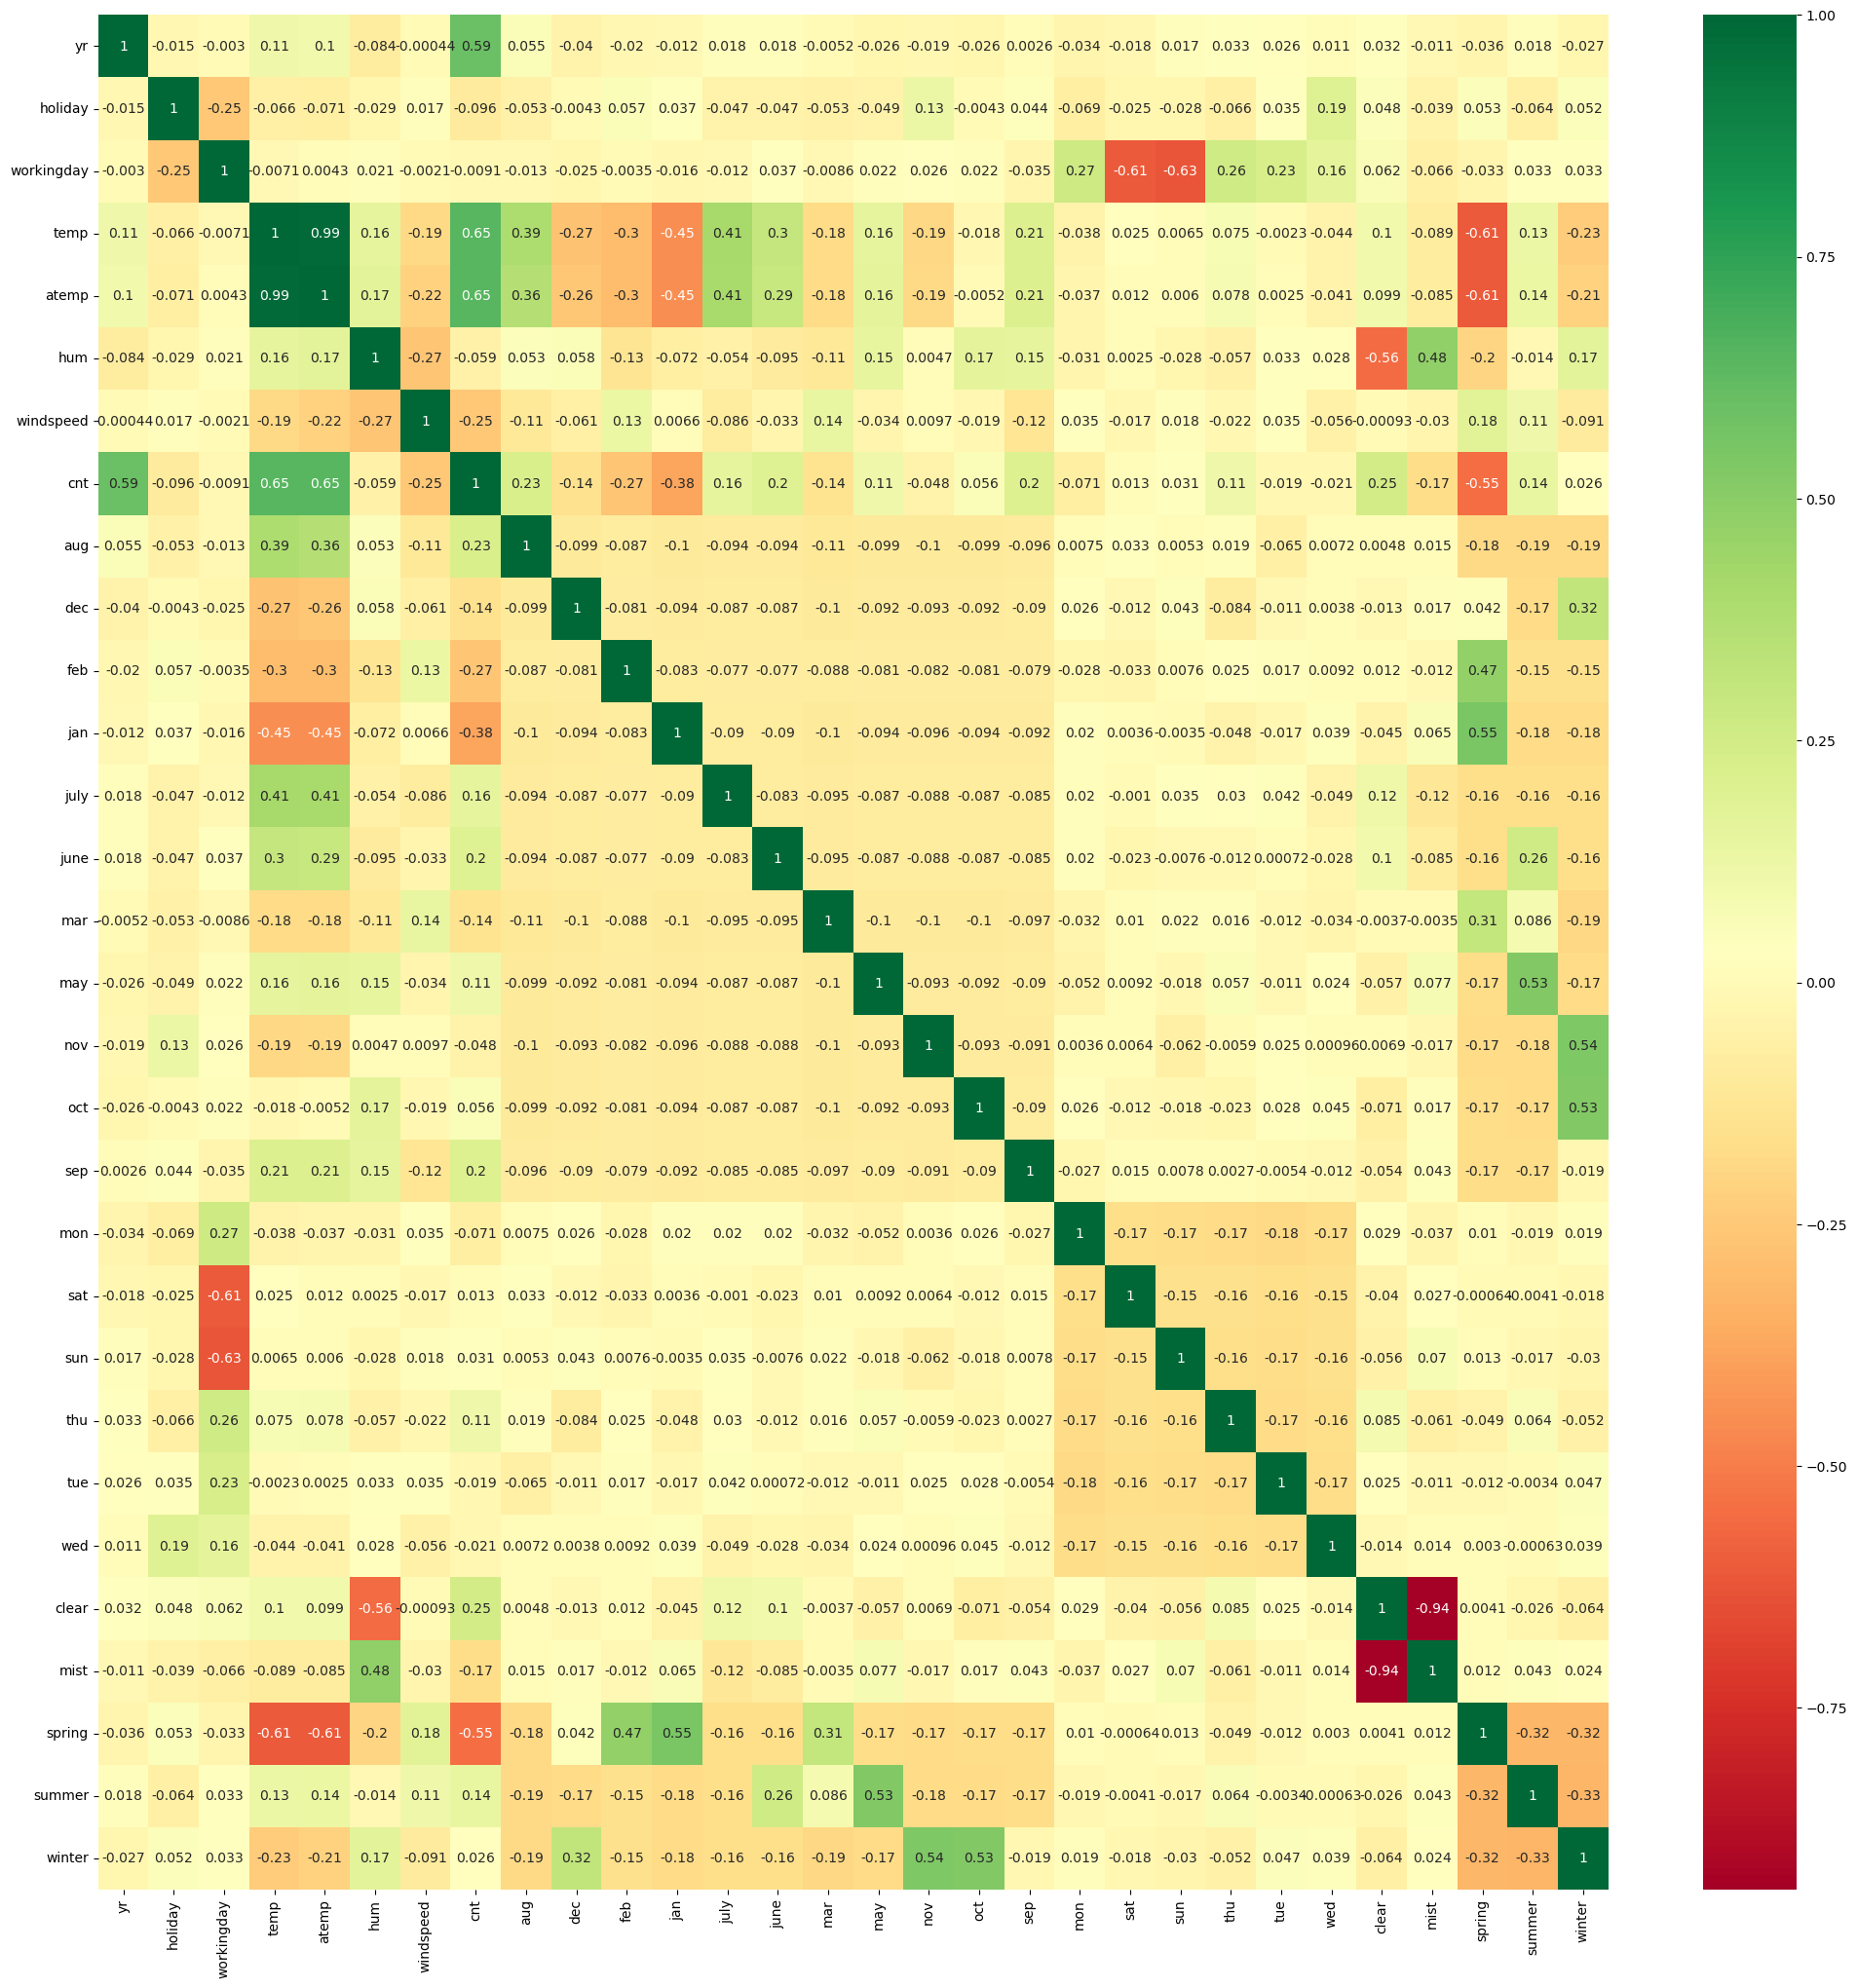

In [50]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
sns.heatmap(bike_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

#### cnt seems to have correlation with year variable and temp. Similarly, Misty and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

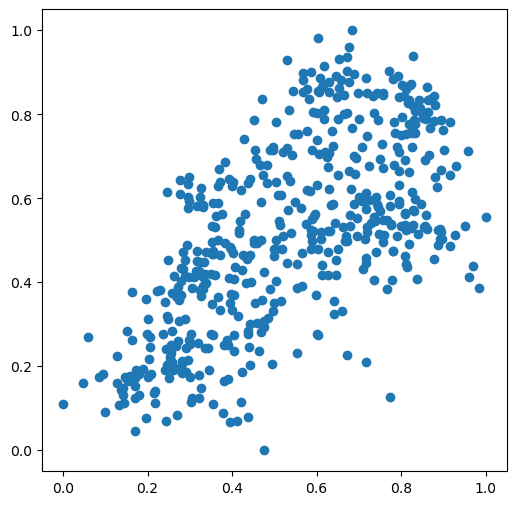

In [51]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(bike_train.temp, bike_train.cnt)
plt.show()

Visualization confirms the positive correlation between temp and cnt.

In [52]:
# Building the Linear Model

y_train = bike_train.pop('cnt')
X_train = bike_train

In [53]:
from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression




In [54]:
#USING RFE APPROACH FOR FEATURE SELECTION
# WE START WITH 15 VARS AND WILL USE MIXED APPROACH TO BUILD A MODEL

lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm , n_features_to_select=15)
#running RFE
rfe = rfe.fit(X_train , y_train)


In [55]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 12),
 ('mar', False, 15),
 ('may', False, 9),
 ('nov', True, 1),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', False, 5),
 ('sun', False, 6),
 ('thu', False, 14),
 ('tue', False, 7),
 ('wed', False, 11),
 ('clear', True, 1),
 ('mist', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [56]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'dec', 'jan', 'july',
       'nov', 'sep', 'clear', 'mist', 'spring', 'summer', 'winter'],
      dtype='object')


In [57]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'june', 'mar', 'may', 'oct', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [59]:
# Generic function to calculate VIF of variables

def calculateVIF(bike):
    vif = pd.DataFrame()
    vif['Features'] = bike.columns
    vif['VIF'] = [variance_inflation_factor(bike.values, i) for i in range(bike.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [60]:
X_train_rfe = X_train[col]

In [61]:
X_train_rfe

,yr,holiday,temp,hum,windspeed,dec,jan,july,nov,sep,clear,mist,spring,summer,winter
576,1,0,0.815169,0.725633,0.264686,0,0,1,0,0,1,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,1,1,0,0
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,1,0,1,0,0
482,1,0,0.395666,0.504508,0.188475,0,0,0,0,0,0,1,0,1,0
111,0,0,0.345824,0.751824,0.380981,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,0.863973,0.679690,0.187140,0,0,0,0,0,1,0,0,0,0
53,0,0,0.202618,0.435939,0.111379,0,0,0,0,0,1,0,1,0,0
350,0,0,0.248216,0.577930,0.431816,1,0,0,0,0,0,1,0,0,1
79,0,0,0.462664,0.759870,0.529881,0,0,0,0,0,0,1,0,1,0


In [62]:
calculateVIF(X_train_rfe)

,Features,VIF
3,hum,26.33
2,temp,25.12
10,clear,15.65
11,mist,9.30
12,spring,5.75
4,windspeed,4.67
14,winter,4.53
13,summer,3.30
0,yr,2.10
8,nov,1.91


humidity shows high VIF value.

# Building a linear model

In [63]:
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [64]:
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Fri, 21 Jul 2023   Prob (F-statistic):          8.15e-189
Time:                        13:03:14   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0732      0.048      1.540      0.1

In [65]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
9,clear,15.65
2,temp,14.02
10,mist,8.82
3,windspeed,4.66
11,spring,4.41
13,winter,3.36
12,summer,2.78
0,yr,2.08
7,nov,1.89
5,jan,1.74


VIF values seems to be good now. But we will see if we can reduce further ?

In [66]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Fri, 21 Jul 2023   Prob (F-statistic):          4.75e-186
Time:                        13:03:14   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0467      0.039     -1.194      0.2

In [67]:
# We can drop nov variable as it has high p-value
X_train_new = X_train_new.drop(['nov'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
8,clear,14.97
2,temp,13.41
9,mist,8.50
3,windspeed,4.63
10,spring,4.35
12,winter,2.76
11,summer,2.74
0,yr,2.08
5,jan,1.72
6,july,1.60


VIF doesnt seems to be affected much after dropping few of the variables. Lets proceed more to observe better model.

In [68]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Fri, 21 Jul 2023   Prob (F-statistic):          2.74e-186
Time:                        13:03:14   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0596      0.039     -1.537      0.1

In [69]:
# We can drop dec variable as it has high p-value
X_train_new = X_train_new.drop(['dec'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
7,clear,14.45
2,temp,13.01
8,mist,8.21
3,windspeed,4.62
9,spring,4.33
10,summer,2.74
11,winter,2.65
0,yr,2.08
4,jan,1.66
5,july,1.59


In [70]:
#Building the 4th linear model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Fri, 21 Jul 2023   Prob (F-statistic):          8.14e-187
Time:                        13:03:14   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0700      0.038     -1.826      0.0

In [71]:
# We can drop jan variable as it has high p-value
X_train_new = X_train_new.drop(['jan'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
6,clear,14.02
2,temp,12.55
7,mist,7.91
3,windspeed,4.59
8,spring,3.98
9,summer,2.74
10,winter,2.64
0,yr,2.07
4,july,1.59
5,sep,1.35


In [72]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Fri, 21 Jul 2023   Prob (F-statistic):          5.06e-187
Time:                        13:03:14   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0848      0.038     -2.239      0.0

In [73]:
# We can drop july variable as it has high p-value
X_train_new = X_train_new.drop(['july'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
5,clear,13.98
2,temp,11.62
6,mist,7.90
3,windspeed,4.59
7,spring,3.85
9,winter,2.44
8,summer,2.37
0,yr,2.07
4,sep,1.23
1,holiday,1.04


VIF value now seems to be good as it came below 5.

In [74]:
# Building 6th linear regression model

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Fri, 21 Jul 2023   Prob (F-statistic):          1.47e-186
Time:                        13:03:14   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0942      0.038     -2.481      0.0

#### We can cosider the above model i.e lr_6, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.

#### F-Statistics value of 248.4 (which is greater than 1) and the p-value of 1.47e-186 i.e almost equals to zero, states that the overall model is significant

In [75]:
# Checking the parameters and their coefficient values
lr_6.params

const       -0.094177
yr           0.234132
holiday     -0.096316
temp         0.477737
windspeed   -0.148098
sep          0.090998
clear        0.285031
mist         0.206291
spring      -0.055406
summer       0.062076
winter       0.094476
dtype: float64

# Residual Analysis of the train data and validation

In [76]:
X_train_lm_6

,const,yr,holiday,temp,windspeed,sep,clear,mist,spring,summer,winter
576,1.0,1,0,0.815169,0.264686,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,1,1,0,0
728,1.0,1,0,0.245101,0.663106,0,1,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,0,1,0,1,0
111,1.0,0,0,0.345824,0.380981,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,1,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,1,0,1,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,0,1
79,1.0,0,0,0.462664,0.529881,0,0,1,0,1,0


In [77]:
y_train_pred = lr_6.predict(X_train_lm_6)

Normality of error terms

Text(0.5, 0, 'Errors')

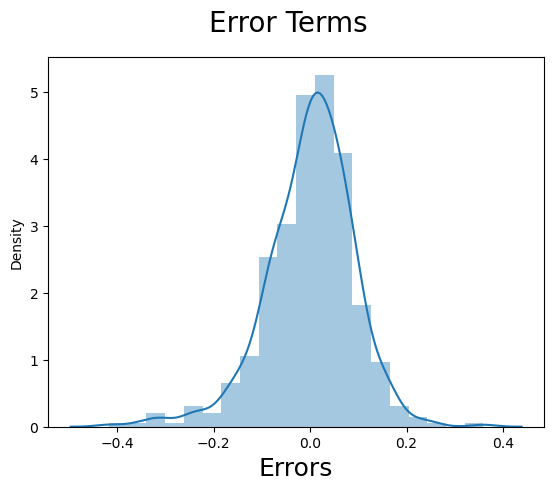

In [78]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Error terms are following normal distribution

#### Multi Colinearity

In [79]:
calculateVIF(X_train_new)

,Features,VIF
5,clear,13.98
2,temp,11.62
6,mist,7.90
3,windspeed,4.59
7,spring,3.85
9,winter,2.44
8,summer,2.37
0,yr,2.07
4,sep,1.23
1,holiday,1.04


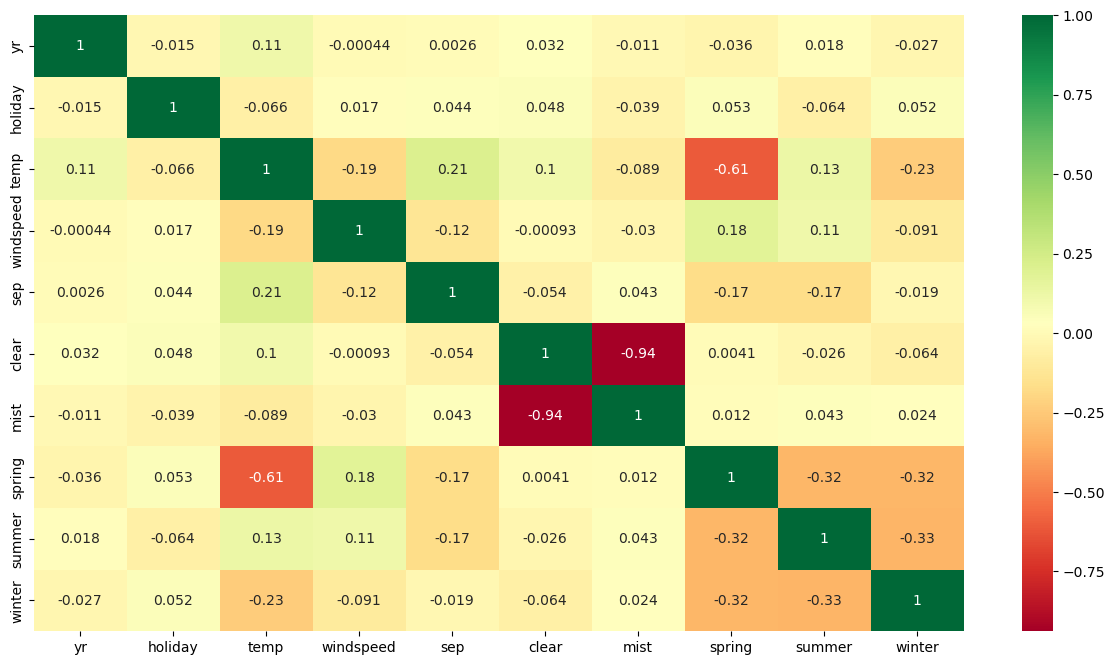

In [80]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

#### Linearity

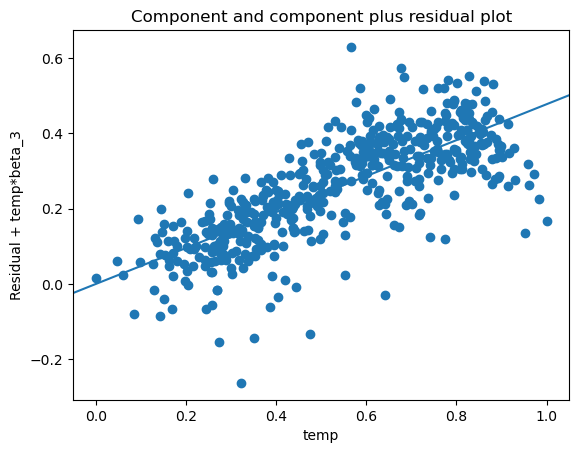

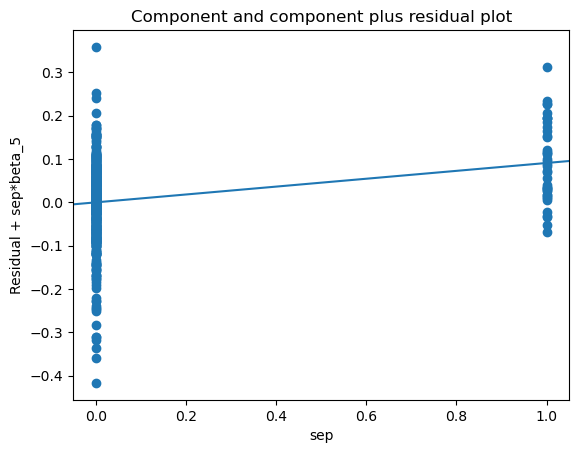

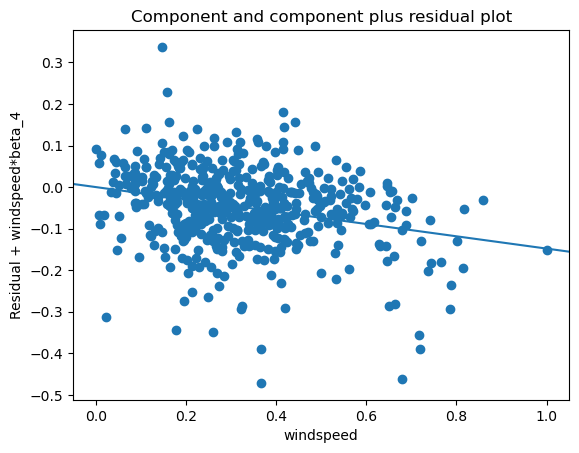

In [81]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'windspeed')
plt.show()

Linearity can be observed from above visualizations.



#### Homoscedasticity

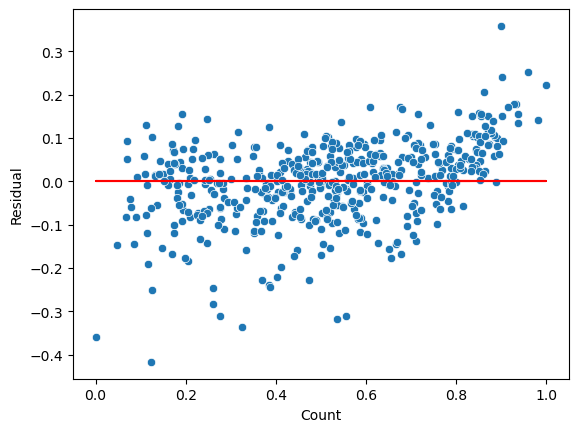

In [82]:
y_train_pred = lr_6.predict(X_train_lm_6)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible pattern observed from above plot for residuals.

### Independence of residuals

Durbin-Watson value of final model lr_6 is 2.085, which signifies there is no autocorrelation.

#  Making Predictions Using the Final Model


Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 6th model.

In [83]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,clear,mist,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,1,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,1,0,0,1,0,0,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,1,0,0,0,0,1,0,0,1,0


In [84]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,clear,mist,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.172727,0.154545,0.140909,0.122727,0.159091,0.654545,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.378873,0.362295,0.348721,0.328872,0.366595,0.476601,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [86]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [87]:
y_pred = lr_6.predict(X_test_lm_6)

In [88]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8038

# Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

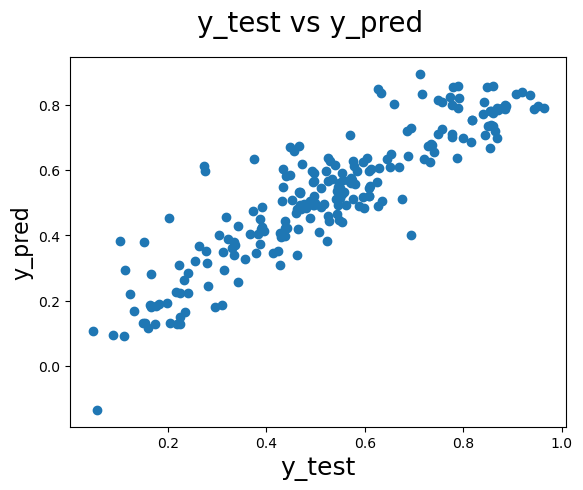

In [89]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [90]:
round(lr_6.params,4)

const       -0.0942
yr           0.2341
holiday     -0.0963
temp         0.4777
windspeed   -0.1481
sep          0.0910
clear        0.2850
mist         0.2063
spring      -0.0554
summer       0.0621
winter       0.0945
dtype: float64

We can see that the equation of our best fitted line is:

𝑐𝑛𝑡=0.1909+0.2341×𝑦𝑒𝑎𝑟−0.0963×ℎ𝑜𝑙𝑖𝑑𝑎𝑦+0.4777×𝑡𝑒𝑚𝑝−0.1481×𝑤𝑖𝑛𝑑𝑠𝑝𝑒𝑒𝑑+0.0910×𝑠𝑒𝑝−0.2850×𝐿𝑖𝑔ℎ𝑡𝑠𝑛𝑜𝑤𝑟𝑎𝑖𝑛−0.0787×𝑀𝑖𝑠𝑡𝑦−0.0554×𝑠𝑝𝑟𝑖𝑛𝑔+0.0621×𝑠𝑢𝑚𝑚𝑒𝑟+0.0945×𝑤𝑖𝑛𝑡𝑒𝑟

In [91]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7944


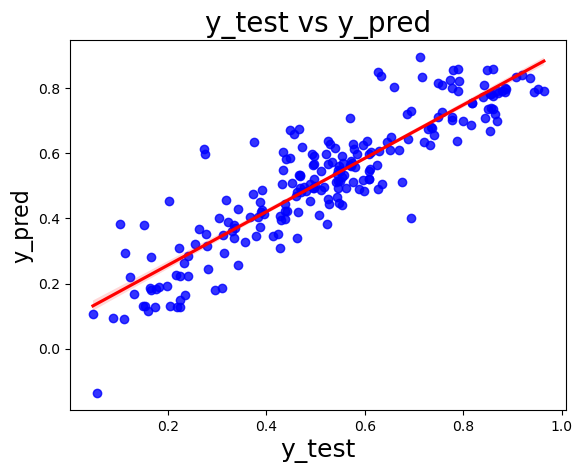

In [92]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# Comparision between Training and Testing dataset:


- Train dataset R^2          : 0.833
- Test dataset R^2           : 0.8038
- Train dataset Adjusted R^2 : 0.829    
- Test dataset Adjusted R^2  : 0.7944


##### Demand of bikes depend on year, holiday, temp, windspeed, sep, Light_snowrain, Misty, spring, summer and winter.